In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import random

np.random.seed(42)

In [2]:
# Generating synthetic dataset
# y = m_k*X_k + b_k + noise -> for simplicity generating sythetic dataset for just 1 variable, m = 2, b = 3

samples = 5000
b = 3
m = 2
X = np.random.rand(samples)
noise = np.random.normal(loc=0, scale=1, size=samples)
Y = (m*X) + 3 + noise
Y

array([3.15210595, 2.51112425, 4.05176714, ..., 3.50242512, 6.04669529,
       6.03644037], shape=(5000,))

In [ ]:
# Batch Gradient descent

epochs = 1000
lr = 0.01
tol = 0.00001

m = random.random() # choosing a random slope(m) between 0 and 1
b = random.random() # choosing a random intercept(b) between 0 and 1

# lists to keep track of variables during grad descent
mse_arr = []
m_arr = []
b_arr = []

for i in range(epochs):
    
    #calculate y_hat
    y_hat = (m * X) + b
    
    #calculate the MSE
    mse = np.sum(np.pow((y_hat - Y), 2))/(Y.shape[0])

    
    #calculate partial derivates wrt m and b
    partial_der_m = (-2 * np.sum(X * (Y - y_hat))) / (Y.shape[0])
    partial_der_b = (-2 * np.sum(Y - y_hat)) / (Y.shape[0])
    
    # update coefficeints m and b
    m = m - (lr * partial_der_m)
    b = b - (lr * partial_der_b)

    m_arr.append(m)
    b_arr.append(b)
    mse_arr.append(mse)
    
    # implement early-stopping(if the gradient descent has converged)
    if i>0 and abs(mse - mse_arr[i-1]) <= tol:
        print(f"Gradient descent converged at {i}")
        break



Gradient descent converged at 219


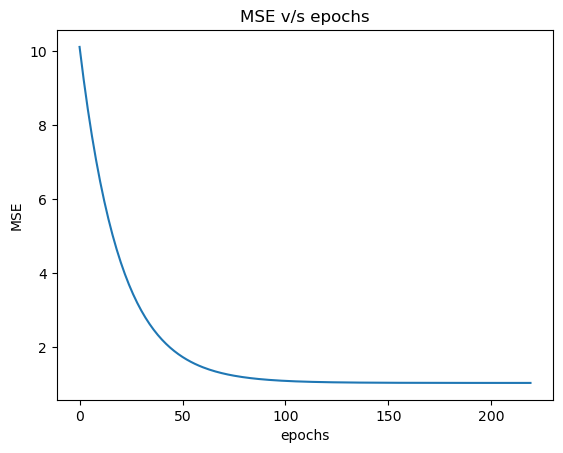

In [30]:
# plot the MSE v/s epochs
plt.plot(mse_arr)
plt.xlabel("epochs")
plt.ylabel("MSE")
plt.title("MSE v/s epochs")
plt.show()